In [1]:
import os
import sys
import math
import time
import numpy as np
import pyfftw as ft 
import matplotlib
import matplotlib.pyplot as plt

In [2]:
nproc = 8

Nx = Ny = Nz = 1024
ny = Ny
nz = Nz
nx = Nx//nproc
t = 0.0

In [3]:
t1 = time.time()

vx = ft.zeros_aligned((Nx,Ny,Nz), dtype='float32')
vxslab = ft.zeros_aligned((nx,ny,nz), dtype='float32')

vy = ft.zeros_aligned((Nx,Ny,Nz), dtype='float32')
vyslab = ft.zeros_aligned((nx,ny,nz), dtype='float32')

vz = ft.zeros_aligned((Nx,Ny,Nz), dtype='float32')
vzslab = ft.zeros_aligned((nx,ny,nz), dtype='float32')

t2 = time.time()
print("time alocating vectors: "+str(t2-t1)+" seconds")

time alocating vectors: 83.03604626655579seconds


In [4]:
folder = "/home/idies/workspace/scratch"

t1 = time.time()

for k in range(nproc):
    filename = "kun-isotropic1024coarse-"+str(k)+"-(t="+str(t)+")"+".npz"
    file = folder + "/" + filename
    content = np.load(file)
    
    vxslab[:,:,:] = content['vx']
    vyslab[:,:,:] = content['vy']
    vzslab[:,:,:] = content['vz']
    
    vx[k*nx:(k+1)*nx,:,:] = vxslab[:,:,:]
    vy[k*nx:(k+1)*nx,:,:] = vyslab[:,:,:]
    vz[k*nx:(k+1)*nx,:,:] = vzslab[:,:,:]
    
t2 = time.time()
print("time reading from disk: "+str(t2-t1)+" seconds")

time reading from disk: 216.53051853179932 seconds


time plotting 3 slices: 2.1496334075927734 seconds


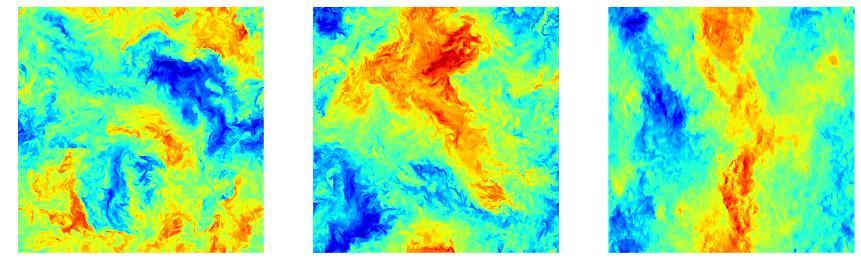

In [6]:
t1 = time.time()

zperp = vx[:,:,0] 
yperp = vy[:,0,:] 
xperp = vy[0,:,:] 

fig = plt.figure(figsize = (15, 5))
a = fig.add_subplot(131)
a.set_axis_off()
a.imshow(zperp,
         extent = [0,2*np.pi,0,2*np.pi],
         interpolation = 'none')

b = fig.add_subplot(132)
b.set_axis_off()
b.imshow(yperp,
         extent = [0,2*np.pi,0,2*np.pi],
         interpolation = 'none')

c = fig.add_subplot(133)
c.set_axis_off()
c.imshow(xperp,
         extent = [0,2*np.pi,0,2*np.pi],
         interpolation = 'none')

t2 = time.time()
print("time plotting 3 slices: "+str(t2-t1)+" seconds")

time plotting 1 slice: 1.0783801078796387 seconds


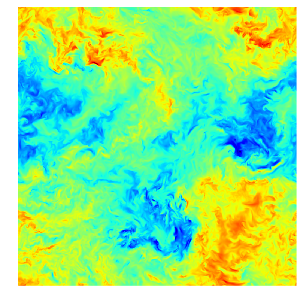

In [7]:
t1 = time.time()

zperp = vx[:,:,300] 

fig = plt.figure(figsize = (5, 5))
a = fig.add_subplot(111)
a.set_axis_off()
a.imshow(zperp,
         extent = [0,2*np.pi,0,2*np.pi],
         interpolation = 'none')

t2 = time.time()
print("time plotting 1 slice: "+str(t2-t1)+" seconds")